In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseclinicaldata_df = pd.merge(mouse_data_df, clinical_data_df, how='outer', on='Mouse ID')


# Display the data table for preview
mouseclinicaldata_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
meantumorvolume_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).mean()
                                       ['Tumor Volume (mm3)'])

# Preview DataFrame
meantumorvolume_grouped.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semtumorvolume_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).sem()
                                       ['Tumor Volume (mm3)'])

# Preview DataFrame
semtumorvolume_grouped.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [21]:
# Minor Data Munging to Re-Format the Data Frames
#Dropping the 'Tumor Volume (mm3)' to have drugs as columns and timepoints as index
#turning the drug columns into separate columns
meantumorvolume_grouped_reformat = meantumorvolume_grouped.unstack('Drug')
#removing "Tumor Volume (mm3) as top level for cleaner more workable layout
meantumorvolume_grouped_reformat.columns = meantumorvolume_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_mean_tvolume = meantumorvolume_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_mean_tvolume

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [27]:
#Dropping the 'Tumor Volume (mm3)' to have drugs as columns and timepoints as index
#this step will give the Standard Error df the same layout as the Mean df

semtumorvolume_grouped_reformat = semtumorvolume_grouped.unstack('Drug')
semtumorvolume_grouped_reformat.columns = semtumorvolume_grouped_reformat.columns.droplevel()
final_sem_tvolume = semtumorvolume_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_sem_tvolume

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


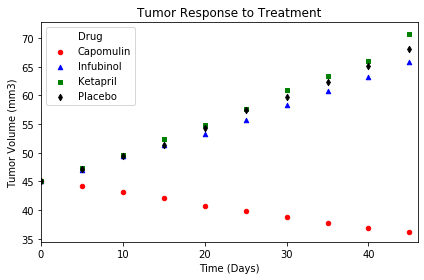

In [62]:
# Generate the Plot (with Error Bars)

#meantumorvolumeplot = final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])

ax = final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Capomulin'], color='red', label='Capomulin', marker='o')
final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Infubinol'], color='blue', label='Infubinol', marker='^',  ax=ax)
final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Ketapril'], color='green', label='Ketapril', marker='s', ax=ax)
final_mean_tvolume.plot(kind='scatter', x='Timepoint', y=['Placebo'], color='black', label='Placebo', marker='d', ax=ax)

plt.xlim(0, meantumorvolume_grouped_reformat.index.max() + 1)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

# Save the Figure

#plt.savefig("../Images/mean_tumor_volume.png")


In [39]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)